<a href="https://colab.research.google.com/github/hamagami/anomaly-detection/blob/main/timm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## timmによる学習済モデルの入手と画像の特徴抽出

timmは学習済み画像認識・分類のモデルライブラリです。多くの優れた学習済モデルが入手できます。ここでは学習済モデルを画像の特徴抽出器として使う方法を示します

timm　のインストールです。PyCaretと同様にGoogleDrive上に展開すればその都度インストールする手間はかかりません

In [ ]:
!pip install timm

In [4]:
import timm
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import timm
from PIL import Image
import matplotlib.pyplot as plt
import glob
import random

In [ ]:
!wget https://dl.dropbox.com/s/xqpcpncceajkjkj/2016-06-14_Orange_and_white_tabby_cat_born_in_2016_%E8%8C%B6%E3%83%88%E3%83%A9%E7%99%BD%E3%81%AD%E3%81%93_DSCF6526%E2%98%86%E5%BD%A1.jpg

In [29]:
img=plt.imread('2016-06-14_Orange_and_white_tabby_cat_born_in_2016_茶トラ白ねこ_DSCF6526☆彡.jpg')


In [9]:
# 学習済みモデルの名前とクラス数
model_name = 'resnet50'
#model_name ='vgg16'
num_classes = 1000  # 例として1000クラス分類モデルを使用

# 画像読み込みと前処理
image_path = '2016-06-14_Orange_and_white_tabby_cat_born_in_2016_茶トラ白ねこ_DSCF6526☆彡.jpg'
image = Image.open(image_path).convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

# GPUが利用可能な場合は、モデルとデータをGPUに移動
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 学習済みモデルの読み込み
model = timm.create_model(model_name, pretrained=True)
model.to(device)
model.eval()

# 特徴抽出
with torch.no_grad():
    input_batch = input_batch.to(device)
    output = model(input_batch)

# モデルの最終層を除いた特徴を取得
features = output.squeeze().cpu().numpy()

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [10]:
len(features)

1000

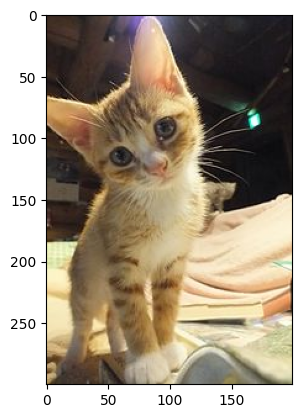

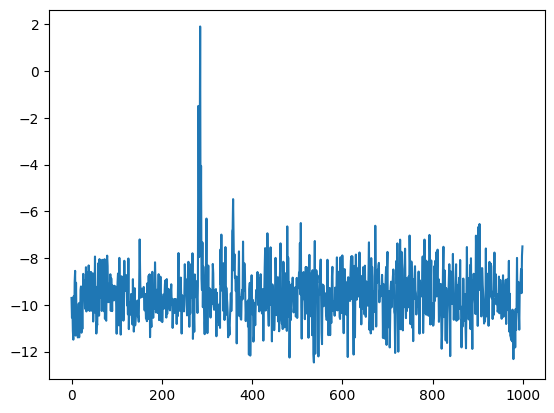

In [11]:
plt.imshow(image)
plt.show()
plt.plot(features)

In [30]:
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

In [31]:
#Download the guitar images. It'll take a while.
!wget https://dl.dropbox.com/s/dmjzsrqa9s22joi/imgs.zip
!unzip -d . imgs.zip

--2023-11-23 07:47:43--  https://dl.dropbox.com/s/dmjzsrqa9s22joi/imgs.zip
Resolving dl.dropbox.com (dl.dropbox.com)... 162.125.2.15, 2620:100:6022:15::a27d:420f
Connecting to dl.dropbox.com (dl.dropbox.com)|162.125.2.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/dmjzsrqa9s22joi/imgs.zip [following]
--2023-11-23 07:47:43--  https://dl.dropboxusercontent.com/s/dmjzsrqa9s22joi/imgs.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.2.15, 2620:100:6022:15::a27d:420f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.2.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25799813 (25M) [application/zip]
Saving to: ‘imgs.zip’

imgs.zip            100%[===================>]  24.60M  92.3MB/s    in 0.3s    

2023-11-23 07:47:45 (92.3 MB/s) - ‘imgs.zip’ saved [25799813/25799813]

Archive:  imgs.zip
  inflating: ./imgs/guitar/1.yamaha_cs40jgg_la.jp

In [32]:
def feature_extraction(model, img_path, image_size=224):
    im=load_img(f)
    img = expand2square(im, (128, 128, 128)).resize((image_size, image_size))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)  # add a dimention of samples
    x = preprocess_input(x)  # RGB 2 BGR and zero-centering by mean pixel based on the position of channels

    feat = model.predict(x)  # Get image features
    feat = feat.flatten()  # Convert 3-dimentional matrix to (1, n) array

    return feat

In [33]:
model = timm.create_model(model_name, pretrained=True)
model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [34]:
files = glob.glob("./imgs/guitar/*")
# test
for f in random.sample(files, 3):
  print(f)
  ret= feature_extraction(model, f, 224)
  plt.imshow(mpimg.imread(f))
  plt.plot(ret*10)
  plt.show()

./imgs/guitar/extened-35_0_1338.jpg


NameError: ignored